# Heart Failure Feature Importance

---

### Overview

We'll use the heart_failures.csv dataset for this analysis.  The target variable we are interested in is **DEATH_EVENT**.

We are not only interested in predicting DEATH_EVENT.  We are also interested in figuring out which features impact this target variable the most.


---

**Prepare the data for modeling**

Remove the "time" variable. This feature does not determine heart failure, so it is unimportant

In [3]:
import pandas, seaborn

data = pandas.read_csv('../Datasets/heart_failures.csv')

In [4]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [5]:
data.drop(columns=['time'], inplace=True)

Now we remove any missing data

In [6]:
data=data.dropna()

In [7]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,0


Looks like there is no missing data

In [16]:
print(data.dtypes)

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
DEATH_EVENT                   int64
dtype: object


Looks like all variables are numerical, so no need to convert any for analysis. 

Let's our features and target variable as X and y. 

In [1]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
X, y = data.drop(columns=['DEATH_EVENT']), data['DEATH_EVENT']
X_scaled = pandas.DataFrame(MinMaxScaler().fit_transform(X), columns=X.columns)
X_scaled

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
294,0.400000,0.0,0.004848,1.0,0.363636,1.0,0.157474,0.067416,0.857143,1.0,1.0
295,0.272727,0.0,0.229268,0.0,0.363636,0.0,0.296884,0.078652,0.742857,0.0,0.0
296,0.090909,0.0,0.259888,1.0,0.696970,0.0,0.869075,0.033708,0.714286,0.0,0.0
297,0.090909,0.0,0.304925,0.0,0.363636,0.0,0.139290,0.101124,0.771429,1.0,1.0


We have set death event as our target variable and rescaled features for X using MinMaxScaler

---

**Pre-modeling Analysis: what are the 5 features that correlate most to DEATH_EVENT?**



In [30]:
data.corr().round(3)[["DEATH_EVENT"]].sort_values(by="DEATH_EVENT")

,DEATH_EVENT
ejection_fraction,-0.269
serum_sodium,-0.195
platelets,-0.049
smoking,-0.013
sex,-0.004
diabetes,-0.002
creatinine_phosphokinase,0.063
anaemia,0.066
high_blood_pressure,0.079
age,0.254


Looks like the five features data with the highest correlation to death event are:
1. serum_creatinine (0.294)- this is a positive correlation, meaning the higher serum_creatinine is the more likely that DEATH_EVENT is 1.
2. ejection_fraction (-0.269)- this is a negative correlation, meaning the lower ejection_fraction is the more likely that DEATH_EVENT is 1.
3. age (0.254)
4. serum_sodium(-0.195)
5. high_blood_pressure(0.079)

---

**Pre-modeling Analysis: for each of these 5 features, visualize the difference between the two groups of DEATH_EVENT**



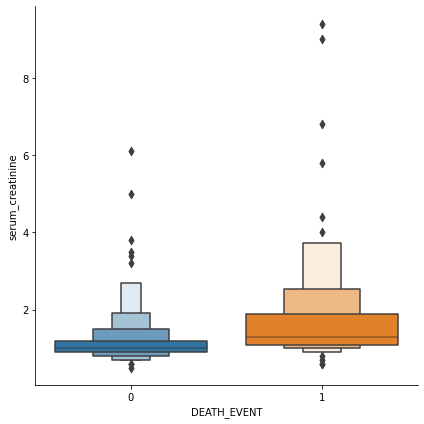

In [47]:
seaborn.catplot(data=data, x="DEATH_EVENT", y="serum_creatinine", kind="boxen", height=6)

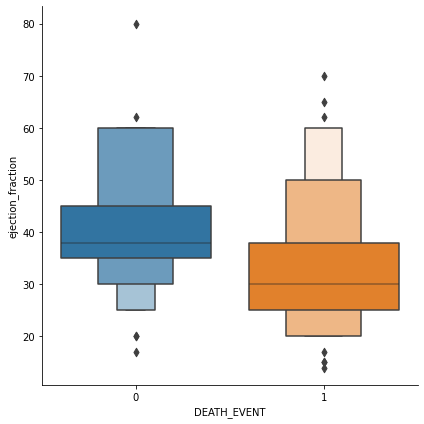

In [38]:
seaborn.catplot(data=data, x="DEATH_EVENT", y="ejection_fraction", kind="boxen", height=6)

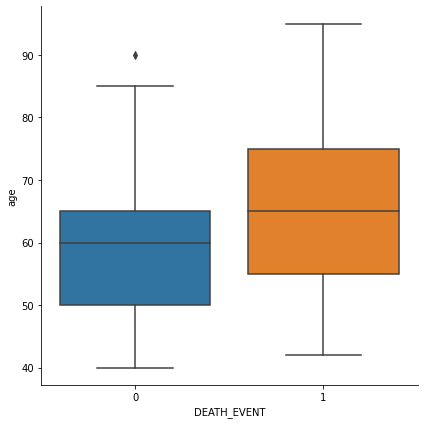

In [41]:
seaborn.catplot(data=data, x="DEATH_EVENT", y="age", kind="box", height=6)

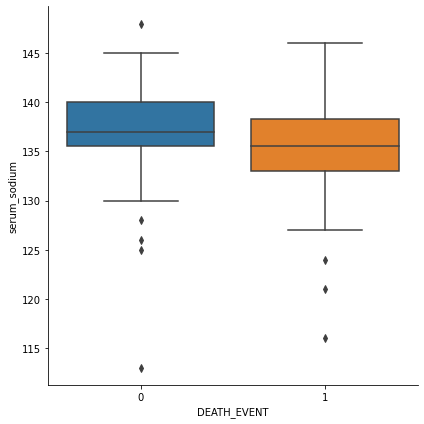

In [54]:
seaborn.catplot(data=data, x="DEATH_EVENT", y="serum_sodium", kind="box", height=6)

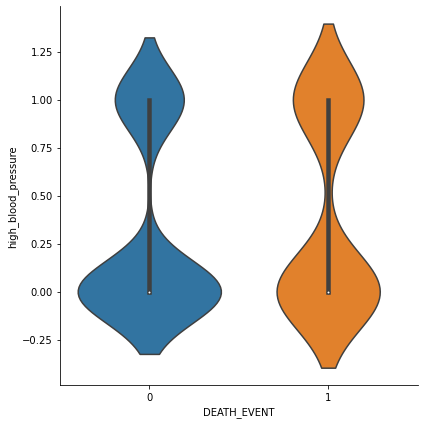

In [52]:
seaborn.catplot(data=data, x="DEATH_EVENT", y="high_blood_pressure", kind= "violin", height=6)

---

**Performance Metric: f1 or accuracy?**

In [11]:
from sklearn.model_selection import RepeatedKFold, cross_validate
from sklearn.svm import LinearSVC

In [59]:
y.value_counts(1)

0    0.67893
1    0.32107
Name: DEATH_EVENT, dtype: float64

data is imbalanced, with 0 having 68% and 1 having 32%, so f1 would be a better measure than accuracy

---

**Which two models perform the best?**

Comparing the performance of these models:
* DummyClassifier
* LinearSVC, set "dual" to False.
* LogisticRegression
* DecisionTreeClassifier

In [9]:
from sklearn.dummy import DummyClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

baseline = DummyClassifier(strategy='stratified')
svm = LinearSVC(dual=False)
logit = LogisticRegression(max_iter=10000)
dt = DecisionTreeClassifier(min_samples_leaf=int(0.1*len(data)))

In [13]:
def eval(model, X, y, cv):
    r = cross_validate(model, X, y, cv=cv, scoring=['f1'])
    return(r['test_f1'].mean())

cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=2022)

## Dummy Classifier

In [15]:
eval(baseline, X_scaled, y, cv)

0.3312878771400712

## Linear SVC

In [17]:
eval(svm, X_scaled, y, cv)

0.4790981823924204

## Logistic Regression

In [19]:
eval(logit, X_scaled, y, cv)

0.3274463055844547

## DecisionTreeClassifier

In [20]:
eval(dt, X_scaled, y, cv)

0.5392740473985309

According to f1 score, the two models that perform the best are Linear SVC and DecisionTreeClassifer

---

**Which are the top most important features? How do they correlate to DEATH_EVENT?**



In [21]:
svm.fit(X_scaled, y)

LinearSVC(dual=False)

In [22]:
w, b = svm.coef_, svm.intercept_

In [23]:
sorted(list(zip(w[0], X_scaled.columns)))

[(-1.4790012328885231, 'ejection_fraction'),
 (-0.7182822365579782, 'serum_sodium'),
 (-0.12943636199798172, 'platelets'),
 (-0.11836414468424765, 'sex'),
 (0.03665330595877689, 'diabetes'),
 (0.03991492690249603, 'smoking'),
 (0.1357051069152821, 'anaemia'),
 (0.15427985094919253, 'high_blood_pressure'),
 (0.7096058459454551, 'creatinine_phosphokinase'),
 (1.0442680000141833, 'age'),
 (1.9287483288347729, 'serum_creatinine')]

According to SVM, serum_creatinine has the highest impact on DEATH_EVENT; and  ejection_fraction has the 2nd highest impact.

In [29]:
import seaborn
import matplotlib.pyplot as plt
import pandas
import numpy as np

def plot_feature_importance(
    importances, 
    feature_names,
    output_file=None, 
    rounding=2, 
    label_adjustment=0.1, 
    dpi=200,
):
    importance = np.abs(importances) / sum(np.abs(importances))
    df = pandas.DataFrame({
        'Feature': feature_names,
        'Importance': importance, 
    })
    data = df.round(rounding).sort_values(by='Importance', ascending=False)
    seaborn.set_style('whitegrid')
    fig = seaborn.barplot(data=data, x='Importance', y='Feature')
    fig.set(ylabel='', xlabel='Importance (normalized)')
    fig.bar_label(fig.containers[0])
    plt.gcf().subplots_adjust(left=label_adjustment)
    if output_file is not None:
        plt.savefig(output_file, dpi=dpi)
    plt.show()

In [30]:
dt.fit(X_scaled, y)

DecisionTreeClassifier(min_samples_leaf=29)

### Decision Tree

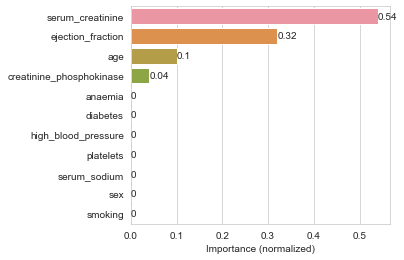

In [31]:
plot_feature_importance(
    dt.feature_importances_,
    feature_names = X_scaled.columns,
    output_file = 'feature_importance',
    label_adjustment=0.3
)

### SVM

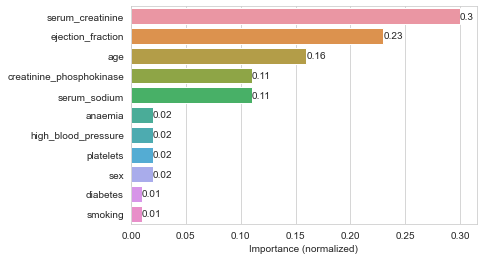

In [32]:
plot_feature_importance(
    svm.coef_[0], 
    feature_names = X.columns,
)

According to decision tree model, serum_creatinine has the most impact on the target, followed by ejection_fraction

---

**Analysis of all Features vs. Top 3**



The top three most important features are 
1. serum_creatinine
2. ejection_fraction
3. age

Decision Tree performs slightly better than Linear SVC, so let's use Decision Tree for classification. 

When using all features, the performance of decision tree is:

In [107]:
r1 = cross_validate(
    dtree, 
    X_scaled, 
    y, 
    cv = cv,
    scoring = ['f1'])
print(r1['test_f1'].mean())

0.4985668770858285


Let's redefine X to just have the three most important features

In [126]:
X= X_scaled[['serum_creatinine', 'ejection_fraction', 'age']]

In [125]:
X

,serum_creatinine,ejection_fraction,age
0,0.157303,0.090909,0.636364
1,0.067416,0.363636,0.272727
2,0.089888,0.090909,0.454545
3,0.157303,0.090909,0.181818
4,0.247191,0.090909,0.454545
...,...,...,...
294,0.067416,0.363636,0.400000
295,0.078652,0.363636,0.272727
296,0.033708,0.696970,0.090909
297,0.101124,0.363636,0.090909


In [124]:
r1 = cross_validate(
    dtree, 
    X, 
    y, 
    cv = cv,
    scoring = ['f1'])
print(r1['test_f1'].mean())

0.5526097438396239


The model with just the three most important features seems to perform a little better than the model with all the features. 

---

**Conclusion**

This dataset comes from a research article published in 2020: https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5


The authors' said that classification can be performed solely using the features ejection_fraction and serum_creatinine. They also said that predictions performed on just those two features alone is more accurate than predicitions performed on the complete dataset


I agree that the most important features are serum_creatinine and ejection_fraction. I also agree that based off of these two features, a more accurate prediction can be performed on predicting failure, as the decision tree model with just the three most important features performed better than the model with all features. 